# Your Title Information Goes Here
Fill me in

## Setup

In [1]:
include("Include.jl");

    Updating git-repo `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git`
    Updating registry at `C:\Users\Lillian K\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\Lillian K\OneDrive\Documents\CHEME 5660\5660-FINAL-PUBLIC-REPO\CHEME-5660-Final-Project\Project.toml`
  No Changes to `C:\Users\Lillian K\OneDrive\Documents\CHEME 5660\5660-FINAL-PUBLIC-REPO\CHEME-5660-Final-Project\Manifest.toml`
  Activating project at `C:\Users\Lillian K\OneDrive\Documents\CHEME 5660\5660-FINAL-PUBLIC-REPO\CHEME-5660-Final-Project`
  No Changes to `C:\Users\Lillian K\OneDrive\Documents\CHEME 5660\5660-FINAL-PUBLIC-REPO\CHEME-5660-Final-Project\Project.toml`
  No Changes to `C:\Users\Lillian K\OneDrive\Documents\CHEME 5660\5660-FINAL-PUBLIC-REPO\CHEME-5660-Final-Project\Manifest.toml`
    Updating registry at `C:\Users\Lillian K\.julia\registries\General.toml`
    Updating git-repo `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git

## Prerequisites: Load historical dataset, compute expected returns and get 2023 `SPY` data
We gathered a daily open-high-low-close `dataset` for each firm in the [S&P500](https://en.wikipedia.org/wiki/S%26P_500) since `01-03-2018` until `12-01-2023`, along with data for a few exchange traded funds and volatility products during that time. 

In [2]:
original_dataset = load(joinpath(_PATH_TO_DATA, 
        "SP500-Daily-OHLC-1-3-2018-to-12-01-2023QQQ.jld2")) |> x-> x["dataset"];

### Clean the data
Not all of the tickers in our dataset have the maximum number of trading days for various reasons, e.g., acquistion or de-listing events. Let's collect only those tickers with the maximum number of trading days.

* First, let's compute the number of records for a company that we know has a maximim value, e.g., `AAPL` and save that value in the `maximum_number_trading_days` variable:

In [3]:
maximum_number_trading_days = original_dataset["AAPL"] |> nrow;

Now, lets iterate through our data and collect only those tickers that have `maximum_number_trading_days` records. Save that data in the `dataset::Dict{String,DataFrame}` variable:

In [4]:
dataset = Dict{String,DataFrame}();
for (ticker,data) ‚àà original_dataset
    if (nrow(data) == maximum_number_trading_days)
        dataset[ticker] = data;
    end
end
dataset;

Let's get a list of firms that we have in cleaned up `dataset`, and save it in the `all_tickers` array:

In [5]:
all_tickers = keys(dataset) |> collect |> sort;
K = length(all_tickers);

### Get the 2023 `SPY` data

In [6]:
startdate = Date(2023,01,03);
SPY_dataset = dataset["SPY"];
SPY_df = filter(:timestamp => x-> x >= startdate, SPY_dataset);


### Compute the expected return for all firms in the dataset
The expected return $\mathbb{E}(r_{i})$ and covariance matrix $\Sigma$ will be used in our calculations, so we'll provide values for both of these items for the entire data set (all `N = 459` tickers), and then you can pick out which tickers you are interested in. 

* First, we compute the expected (annualized) log return by passing the `dataset` and the entire list of firms we have in the dataset (held in the $N\times{1}$ `all_array` array) to the `log_return_matrix(...)` method. The result is stored in the `all_firms_return_matrix` variable, a $T-1\times{N}$ array of log return values. Each row of `all_firms_return_matrix` corresponds to a time-value, while each column corresponds to a firm:

In [7]:
all_firms_return_matrix = log_return_matrix(dataset, all_tickers, 
    Œît = (1.0/252.0), risk_free_rate = 0.0);

## Your project starts here ....

In [8]:
risk_free_rate = 0.05;

In [9]:
all_tickers = keys(dataset) |> collect |> sort;

## Disclaimer and Risks
__This content is offered solely for training and  informational purposes__. No offer or solicitation to buy or sell securities or derivative products, or any investment or trading advice or strategy,  is made, given, or endorsed by the teaching team. 

__Trading involves risk__. Carefully review your financial situation before investing in securities, futures contracts, options, or commodity interests. Past performance, whether actual or indicated by historical tests of strategies, is no guarantee of future performance or success. Trading is generally inappropriate for someone with limited resources, investment or trading experience, or a low-risk tolerance.  Only risk capital that is not required for living expenses.

__You are fully responsible for any investment or trading decisions you make__. Such decisions should be based solely on your evaluation of your financial circumstances, investment or trading objectives, risk tolerance, and liquidity needs.

In [10]:
all_firms_excess_return_matrix = log_return_matrix(dataset, all_tickers, 
    Œît = (1.0/252.0), risk_free_rate = risk_free_rate);

In [11]:
Œº = mean(all_firms_excess_return_matrix, dims=1) |> vec;

In [12]:
sims = load(joinpath(_PATH_TO_DATA, "SIMs-Kuang-PD1-CHEME-5660-Fall-2023.jld2")) |> x->x["sims"];

In [13]:
index_SPY = findfirst(x->x=="SPY", all_tickers);
R_SPY = Œº[index_SPY]

0.039473529456023046

In [14]:
Œº_sim = Array{Float64,1}();
for i ‚àà eachindex(all_tickers)
    
    myticker = all_tickers[i];
    sim = sims[myticker];
    
    Œ±·µ¢ = sim.Œ±
    Œ≤·µ¢ = sim.Œ≤
    R·µ¢ = Œ±·µ¢+Œ≤·µ¢*R_SPY
    
    push!(Œº_sim,R·µ¢)
end

In [15]:
risk_free_rate = 0.05;

In [16]:
all_firms_excess_return_matrix = log_return_matrix(dataset, all_tickers, 
    Œît = (1.0/252.0), risk_free_rate = risk_free_rate);

In [17]:
Œº = mean(all_firms_excess_return_matrix, dims=1) |> vec;

In [19]:
œÉ‚Çò = std(all_firms_excess_return_matrix[:, index_SPY]);

In [20]:
Œ£_tmp = Array{Float64,2}(undef, length(Œº), length(Œº));
for i ‚àà eachindex(all_tickers)
    outer_ticker = all_tickers[i];
    sim_outer = sims[outer_ticker];
    
    for j ‚àà eachindex(all_tickers)
        
        inner_ticker = all_tickers[j];
        sim_inner = sims[inner_ticker];
        
        if (i == j)
            Œ≤·µ¢ = sim_outer.Œ≤
            œµ·µ¢ = sim_outer.œµ
            œÉ_œµ·µ¢ = params(œµ·µ¢)[2];
            Œ£_tmp[i,j] = ((Œ≤·µ¢)^2)*((œÉ‚Çò)^2)+(œÉ_œµ·µ¢)^2
        else
            Œ≤·µ¢ = sim_outer.Œ≤
            Œ≤‚±º = sim_inner.Œ≤
            Œ£_tmp[i,j] = Œ≤·µ¢*Œ≤‚±º*(œÉ‚Çò)^2
        end
    end
end
Œ£_sim  = Œ£_tmp |> x-> x*(1/252);

In [21]:

my_list_of_tickers = ["MSFT", "AMD", "NVDA", "RCL", "PHM", "V", "SPY", "QQQ"];
my_list_of_firm_ids = Array{Int64,1}();
for ticker ‚àà my_list_of_tickers
    firm_index = findfirst(x->x==ticker, all_tickers);    
    push!(my_list_of_firm_ids, firm_index)
end

In [22]:
# --- DO NOT CHANGE THIS BLOCK ----------------------------------------- #
ŒºÃÇ_sim = Array{Float64,1}();
for firm_index ‚àà my_list_of_firm_ids
    push!(ŒºÃÇ_sim, Œº_sim[firm_index])
end
# ---------------------------------------------------------------------- #

In [23]:
# --- DO NOT CHANGE THIS BLOCK FOR SIM  -------------------------------- #
my_number_of_selected_firms = length(my_list_of_firm_ids)
Œ£ÃÇ_sim = Array{Float64,2}(undef, my_number_of_selected_firms, my_number_of_selected_firms);
for i ‚àà eachindex(my_list_of_firm_ids)
    row_firm_index = my_list_of_firm_ids[i]
    for j ‚àà eachindex(my_list_of_firm_ids)
        col_firm_index = my_list_of_firm_ids[j]
        Œ£ÃÇ_sim[i,j] = Œ£_sim[row_firm_index, col_firm_index]
    end
end
# ---------------------------------------------------------------------- #

In [24]:
my_data = Dict{String,Any}();
my_data["expected_excess_return"] = ŒºÃÇ_sim;
my_data["covariance"] = Œ£ÃÇ_sim;
save(joinpath(_PATH_TO_DATA,"MyChoiceSet-Example.jld2"), Dict("dataset" => my_data));

In [25]:
number_of_firms = length(my_list_of_tickers);
w‚Çí = zeros(number_of_firms);
w‚Çí[1] = 1.0;
bounds = zeros(number_of_firms,2);
bounds[:,2] .= 1.0;
number_of_points = 40;

In [26]:
problem_risk_sim = build(MyMarkowitzRiskyAssetOnlyPortfiolioChoiceProblem, (
    Œ£ = Œ£ÃÇ_sim,
    Œº = ŒºÃÇ_sim,
    bounds = bounds,
    initial = w‚Çí,
    R = 0.0
));

In [27]:
minimum_desired_reward_array = range(0.0, stop = 0.5 - risk_free_rate, length = number_of_points) |> collect;

In [28]:
efficient_frontier_sim = Dict{Float64,Float64}();
portfolio_df = DataFrame();
for i ‚àà eachindex(minimum_desired_reward_array)
    
    # update the problem object -
    problem_risk_sim.R = minimum_desired_reward_array[i];
    
    # compute -
    solution_sim = solve(problem_risk_sim)

    # check: did this converge?
    status_flag = solution_sim["status"];    
    if (status_flag == MathOptInterface.LOCALLY_SOLVED)
        key = sqrt(solution_sim["objective_value"]);
        value = solution_sim["reward"];
        efficient_frontier_sim[key] = value;
        
        w_opt = solution_sim["argmax"];
        
        # add data to portfolio_df -
        row_df = (
            expected_excess_return = value,
            risk = key,
            tickers = my_list_of_tickers,
            w = w_opt,
            risk_free_rate = risk_free_rate
        )
        push!(portfolio_df,row_df);
    end
end
efficient_frontier_sim

Dict{Float64, Float64} with 29 entries:
  0.459087 => 0.323077
  0.353055 => 0.276923
  0.167322 => 0.0692308
  0.163651 => 0.0576923
  0.234238 => 0.196154
  0.329256 => 0.265385
  0.219102 => 0.173077
  0.159659 => 0.0394737
  0.193151 => 0.126923
  0.242819 => 0.207692
  0.404317 => 0.3
  0.212291 => 0.161538
  0.226389 => 0.184615
  0.18167  => 0.103846
  0.159659 => 0.0394736
  0.1993   => 0.138462
  0.160857 => 0.0461539
  0.378156 => 0.288462
  0.307063 => 0.253846
  0.431345 => 0.311538
  0.269058 => 0.230769
  0.159659 => 0.0394736
  0.176454 => 0.0923077
  0.205688 => 0.15
  0.286848 => 0.242308
  ‚ãÆ        => ‚ãÆ

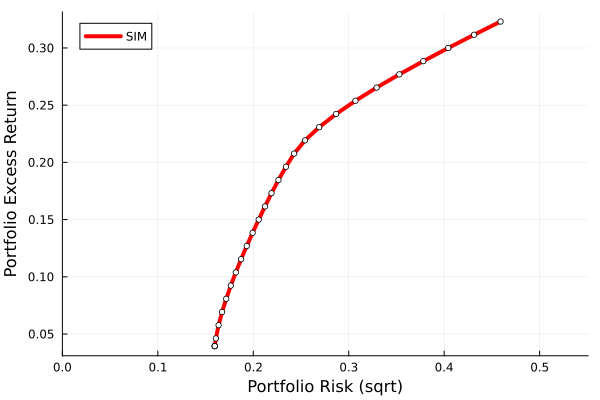

In [29]:
# single index model -
plot(efficient_frontier_sim, lw=4, xlabel="Portfolio Risk (sqrt)", 
    ylabel="Portfolio Excess Return", fontsize=18, label="SIM", c=:red, 
    xlim=(0.0, 1.2*maximum(efficient_frontier_sim).first))
scatter!(efficient_frontier_sim, label="", c=:white, mec=:red, ms=3)

In [30]:
filepath = joinpath(_PATH_TO_DATA, "EfficientFrontier-Example.jld2");
save(filepath, Dict("dataset"=>portfolio_df))

In [31]:
portfolio_df

29√ó5 DataFrame
 Row ‚îÇ expected_excess_return  risk      tickers                            w  ‚ãØ
     ‚îÇ Float64                 Float64   Array‚Ä¶                             Ar ‚ãØ
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ              0.0394736  0.159659  ["MSFT", "AMD", "NVDA", "RCL", "‚Ä¶  [3 ‚ãØ
   2 ‚îÇ              0.0394736  0.159659  ["MSFT", "AMD", "NVDA", "RCL", "‚Ä¶  [3
   3 ‚îÇ              0.0394736  0.159659  ["MSFT", "AMD", "NVDA", "RCL", "‚Ä¶  [3
   4 ‚îÇ              0.0394737  0.159659  ["MSFT", "AMD", "NVDA", "RCL", "‚Ä¶  [5
   5 ‚îÇ              0.0461539  0.160857  ["MSFT", "AMD", "NVDA", "RCL", "‚Ä¶  [0 ‚ãØ
   6 ‚îÇ              0.0576923  0.163651  ["MSFT", "AMD", "NVDA", "RCL", "‚Ä¶  [0
   7 ‚îÇ              0.0692308  0.167322  ["MSFT", "AMD", "NVDA", "RCL", "‚Ä¶  [0
   8 ‚îÇ              0.0807692  0.171659  ["MSFT", "AMD", "NVDA", "RCL", "‚Ä¶  [0
   9 ‚îÇ              0.0923077  0.176454  ["MSFT", "AMD", "NVDA", "RCL", "‚Ä¶  [0 ‚ãØ
  10 ‚îÇ              0.103846   0.18167   ["MSFT", "AMD", "NVDA", "RCL", "‚Ä¶  [0
  11 ‚îÇ              0.115385   0.187264  ["MSFT", "AMD", "NVDA", "RCL", "‚Ä¶  [0
  ‚ãÆ  ‚îÇ           ‚ãÆ                ‚ãÆ                      ‚ãÆ                     ‚ã±
  20 ‚îÇ              0.219231   0.254202  ["MSFT", "AMD", "NVDA", "RCL", "‚Ä¶  [0
  21 ‚îÇ              0.230769   0.269058  ["MSFT", "AMD", "NVDA", "RCL", "‚Ä¶  [0 ‚ãØ
  22 ‚îÇ              0.242308   0.286848  ["MSFT", "AMD", "NVDA", "RCL", "‚Ä¶  [0
  23 ‚îÇ              0.253846   0.307063  ["MSFT", "AMD", "NVDA", "RCL", "‚Ä¶  [0
  24 ‚îÇ              0.265385   0.329256  ["MSFT", "AMD", "NVDA", "RCL", "‚Ä¶  [0
  25 ‚îÇ              0.276923   0.353055  ["MSFT", "AMD", "NVDA", "RCL", "‚Ä¶  [0 ‚ãØ
  26 ‚îÇ              0.288462   0.378156  ["MSFT", "AMD", "NVDA", "RCL", "‚Ä¶  [0
  27 ‚îÇ              0.3        0.404317  ["MSFT", "AMD", "NVDA", "RCL", "‚Ä¶  [0
  28 ‚îÇ              0.311538   0.431345  ["MSFT", "AMD", "NVDA", "RCL", "‚Ä¶  [0
  29 ‚îÇ              0.323077   0.459087  ["MSFT", "AMD", "NVDA", "RCL", "‚Ä¶  [0 ‚ãØ
                                                    2 columns and 8 rows omitted

In [32]:
W‚Çí = 24000000;
number_of_trading_days = 3650;
offset = 1;

In [33]:
P = rand(efficient_frontier_sim);

# œÉ‚Çö = 0.24098137679395285;
# Œº‚Çö = efficient_frontier_sim[œÉ‚Çö];
œÉ‚Çö = P.first
Œº‚Çö = P.second


0.11538461881450994

In [34]:
keys(efficient_frontier_sim)

KeySet for a Dict{Float64, Float64} with 29 entries. Keys:
  0.45908708965710066
  0.3530549271196987
  0.1673223125063499
  0.16365063580897785
  0.23423803045078279
  0.329256335175415
  0.2191020231641521
  0.1596586654609026
  0.19315121224778334
  0.2428188547231246
  0.40431694071741764
  0.21229134640758338
  0.22638909308710187
  0.1816703546789896
  0.15965866666865694
  0.19930033473191275
  0.16085651064149414
  0.3781559885896049
  0.3070631894230345
  0.4313450259208562
  0.26905798715060497
  0.15965866620127456
  0.17645370325618887
  0.20568756576884223
  0.2868483083522768
  ‚ãÆ

In [35]:
wealth_array = Array{Float64,2}(undef, number_of_trading_days, 8);
for i ‚àà 1:number_of_trading_days
    Œît = (i-1)*(1/252);
    
    wealth_array[i,1] = Œît
    wealth_array[i,2] = W‚Çí*exp((Œº‚Çö + risk_free_rate)*Œît);
    wealth_array[i,3] = W‚Çí*exp((Œº‚Çö - œÉ‚Çö + risk_free_rate)*Œît);
    wealth_array[i,4] = W‚Çí*exp((Œº‚Çö + œÉ‚Çö + risk_free_rate)*Œît);
    wealth_array[i,5] = W‚Çí*exp((Œº‚Çö - 1.96*œÉ‚Çö + risk_free_rate)*Œît);
    wealth_array[i,6] = W‚Çí*exp((Œº‚Çö + 1.96*œÉ‚Çö + risk_free_rate)*Œît);
    wealth_array[i,7] = W‚Çí*exp((Œº‚Çö - 2.576*œÉ‚Çö + risk_free_rate)*Œît);
    wealth_array[i,8] = W‚Çí*exp((Œº‚Çö + 2.576*œÉ‚Çö + risk_free_rate)*Œît);
end

In [36]:
wealth_array

3650√ó8 Matrix{Float64}:
  0.0         2.4e7      2.4e7      2.4e7      ‚Ä¶       2.4e7      2.4e7
  0.00396825  2.40158e7  2.39979e7  2.40336e7          2.39698e7  2.40618e7
  0.00793651  2.40315e7  2.39958e7  2.40673e7          2.39397e7  2.41237e7
  0.0119048   2.40473e7  2.39937e7  2.4101e7           2.39096e7  2.41858e7
  0.015873    2.40631e7  2.39917e7  2.41347e7          2.38795e7  2.4248e7
  0.0198413   2.40789e7  2.39896e7  2.41685e7  ‚Ä¶       2.38495e7  2.43105e7
  0.0238095   2.40947e7  2.39875e7  2.42024e7          2.38195e7  2.4373e7
  0.0277778   2.41105e7  2.39854e7  2.42363e7          2.37896e7  2.44358e7
  0.031746    2.41263e7  2.39833e7  2.42702e7          2.37597e7  2.44987e7
  0.0357143   2.41422e7  2.39813e7  2.43042e7          2.37298e7  2.45617e7
  0.0396825   2.4158e7   2.39792e7  2.43382e7  ‚Ä¶       2.37e7     2.46249e7
  0.0436508   2.41739e7  2.39771e7  2.43723e7          2.36702e7  2.46883e7
  0.047619    2.41898e7  2.3975e7   2.44064e7          2.36404e

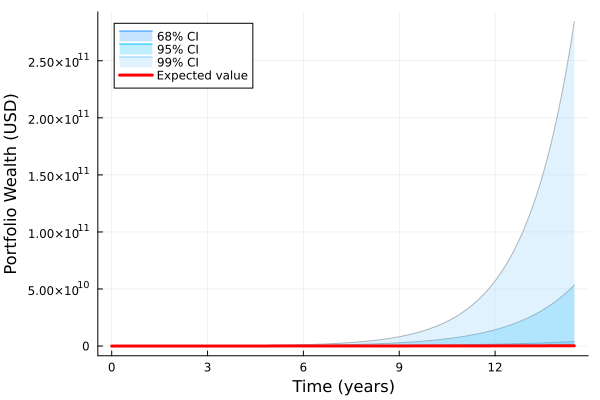

In [37]:
p = plot();
plot!(wealth_array[:,1],wealth_array[:,3],lw=1,label="",c=:gray69)
plot!(wealth_array[:,1],wealth_array[:,4],lw=1,label="", c=:gray69)
plot!(wealth_array[:,1],wealth_array[:,5],lw=1,label="", c=:gray69)
plot!(wealth_array[:,1],wealth_array[:,6],lw=1,label="", c=:gray69)
plot!(wealth_array[:,1],wealth_array[:,7],lw=1,label="", c=:gray69)
plot!(wealth_array[:,1],wealth_array[:,8],lw=1,label="", c=:gray69)

L68 = wealth_array[:,3];
U68 = wealth_array[:,4];
plot!(wealth_array[:,1], L68, fillrange = U68, fillalpha = 0.25, c = :dodgerblue, label = "68% CI")

L95 = wealth_array[:,5];
U95 = wealth_array[:,6];
plot!(wealth_array[:,1], L95, fillrange = U95, fillalpha = 0.25, c = :deepskyblue, label = "95% CI")

L99 = wealth_array[:,7];
U99 = wealth_array[:,8];
plot!(wealth_array[:,1], L99, fillrange = U99, fillalpha = 0.25, c = :lightskyblue, label = "99% CI")

plot!(wealth_array[:,1],wealth_array[:,2],lw=3,label="Expected value", c=:red)
xlabel!("Time (years)", fontsize=18)
ylabel!("Portfolio Wealth (USD)", fontsize=18)

In [38]:
WFP = wealth_array[end,2] |> x-> round(x,digits=2);
WFP_LB = wealth_array[end,3] |> x-> round(x,digits=2)
WFP_UB = wealth_array[end,4] |> x-> round(x,digits=2)
println("The selected portfolio should be worth (L,E,U) = ($(WFP_LB), $(WFP), $(WFP_UB)) USD")

The selected portfolio should be worth (L,E,U) = (1.748324543e7, 2.6318293542e8, 3.96180776358e9) USD


In [40]:
ùíü(r,t) = exp(r*t);

In [41]:
Œît = (number_of_trading_days/252);
NPV_P = -W‚Çí + (1/ùíü(risk_free_rate, Œît))*WFP
println("The expected NPV for this portfolio is NPV = $(NPV_P)")

The expected NPV for this portfolio is NPV = 1.0356716537026086e8


In [46]:
œÉÃÑ‚Çò = œÉ‚Çò*sqrt(1/252) # correct for annualized std dev
wealth_array_SPY = Array{Float64,2}(undef, number_of_trading_days, 8);
for i ‚àà 1:number_of_trading_days
    Œît = (i-1)*(1/252);
    
    wealth_array_SPY[i,1] = Œît
    wealth_array_SPY[i,2] = W‚Çí*exp((R_SPY + risk_free_rate)*Œît);
    wealth_array_SPY[i,3] = W‚Çí*exp((R_SPY - œÉÃÑ‚Çò + risk_free_rate)*Œît);
    wealth_array_SPY[i,4] = W‚Çí*exp((R_SPY + œÉÃÑ‚Çò + risk_free_rate)*Œît);
    wealth_array_SPY[i,5] = W‚Çí*exp((R_SPY - 1.96*œÉÃÑ‚Çò + risk_free_rate)*Œît);
    wealth_array_SPY[i,6] = W‚Çí*exp((R_SPY + 1.96*œÉÃÑ‚Çò + risk_free_rate)*Œît);
    wealth_array_SPY[i,7] = W‚Çí*exp((R_SPY - 2.576*œÉÃÑ‚Çò + risk_free_rate)*Œît);
    wealth_array_SPY[i,8] = W‚Çí*exp((R_SPY + 2.576*œÉÃÑ‚Çò + risk_free_rate)*Œît);
end

In [47]:
SPY_actual = Array{Float64,2}(undef, number_of_trading_days, 2);
SPY_data = dataset["SPY"];
SPY_return = Array{Float64,1}(undef, number_of_trading_days);
for j ‚àà 2:number_of_trading_days+1
    date_index = (j - 1) + offset;
    S‚ÇÅ = SPY_data[(date_index - 1), :volume_weighted_average_price];
    S‚ÇÇ = SPY_data[date_index, :volume_weighted_average_price];
    SPY_return[j-1] = log(S‚ÇÇ/S‚ÇÅ);
end

W·µ¢ = W‚Çí
SPY_actual[1,2] = W‚Çí
for i ‚àà 2:(number_of_trading_days)
    Œît = (i-1)*(1/252);
    
    
    SPY_actual[i,1] = Œît
    SPY_actual[i,2] = W·µ¢*exp(SPY_return[i]);
    W·µ¢ = SPY_actual[i,2];
end

LoadError: BoundsError: attempt to access 1489√ó8 DataFrame at index [1490, :volume_weighted_average_price]

In [48]:
WFSPY = wealth_array_SPY[end,2] |> x-> round(x,digits=2);
WFSPY_LB = wealth_array_SPY[end,3] |> x-> round(x,digits=2)
WFSPY_UB = wealth_array_SPY[end,4] |> x-> round(x,digits=2)
println("SPY only portfolio should be worth (L,E,U) = ($(WFSPY_LB), $(WFSPY), $(WFSPY_UB)) USD")

SPY only portfolio should be worth (L,E,U) = (8.68643614e6, 8.76756964e7, 8.8494609487e8) USD


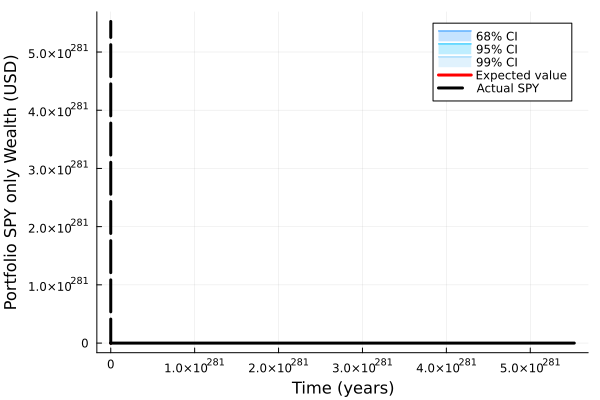

In [49]:
p = plot();
plot!(wealth_array_SPY[:,1],wealth_array_SPY[:,3],lw=1,label="",c=:gray69)
plot!(wealth_array_SPY[:,1],wealth_array_SPY[:,4],lw=1,label="", c=:gray69)
plot!(wealth_array_SPY[:,1],wealth_array_SPY[:,5],lw=1,label="", c=:gray69)
plot!(wealth_array_SPY[:,1],wealth_array_SPY[:,6],lw=1,label="", c=:gray69)
plot!(wealth_array_SPY[:,1],wealth_array_SPY[:,7],lw=1,label="", c=:gray69)
plot!(wealth_array_SPY[:,1],wealth_array_SPY[:,8],lw=1,label="", c=:gray69)

L68 = wealth_array_SPY[:,3];
U68 = wealth_array_SPY[:,4];
plot!(wealth_array_SPY[:,1], L68, fillrange = U68, fillalpha = 0.25, c = :dodgerblue, label = "68% CI")

L95 = wealth_array_SPY[:,5];
U95 = wealth_array_SPY[:,6];
plot!(wealth_array_SPY[:,1], L95, fillrange = U95, fillalpha = 0.25, c = :deepskyblue, label = "95% CI")

L99 = wealth_array_SPY[:,7];
U99 = wealth_array_SPY[:,8];
plot!(wealth_array_SPY[:,1], L99, fillrange = U99, fillalpha = 0.25, c = :lightskyblue, label = "99% CI")

plot!(wealth_array_SPY[:,1],wealth_array_SPY[:,2],lw=3,label="Expected value", c=:red)
plot!(SPY_actual[:,1], SPY_actual[:,2],lw=3,c=:black,ls=:dash, label="Actual SPY")

xlabel!("Time (years)", fontsize=18)
ylabel!("Portfolio SPY only Wealth (USD)", fontsize=18)

In [50]:
Œît = (number_of_trading_days/252);
NPV_SPY = -W‚Çí + (1/ùíü(risk_free_rate, Œît))*WFSPY
println("The expected NPV for this portfolio is NPV = $(NPV_SPY)")

The expected NPV for this portfolio is NPV = 1.84972084294248e7


In [51]:
œÉ‚Çò = std(all_firms_return_matrix[:, index_SPY])

2.5345018373000348

In [52]:
Œ£_tmp = Array{Float64,2}(undef, length(Œº), length(Œº));
for i ‚àà eachindex(all_tickers)
    outer_ticker = all_tickers[i];
    sim_outer = sims[outer_ticker];
    
    for j ‚àà eachindex(all_tickers)
        
        inner_ticker = all_tickers[j];
        sim_inner = sims[inner_ticker];
        
        if (i == j)
            Œ≤·µ¢ = sim_outer.Œ≤
            œµ·µ¢ = sim_outer.œµ
            œÉ_œµ·µ¢ = params(œµ·µ¢)[2];
            Œ£_tmp[i,j] = ((Œ≤·µ¢)^2)*((œÉ‚Çò)^2)+(œÉ_œµ·µ¢)^2
        else
            Œ≤·µ¢ = sim_outer.Œ≤
            Œ≤‚±º = sim_inner.Œ≤
            Œ£_tmp[i,j] = Œ≤·µ¢*Œ≤‚±º*(œÉ‚Çò)^2
        end
    end
end
Œ£_sim  = Œ£_tmp |> x-> x*(1/252);

In [54]:
total_initial_budget = 24000000; 

In [55]:
efficient_frontier = load(joinpath(_PATH_TO_DATA,
        "EfficientFrontier-Kuang-PD1-CHEME-5660-Fall-2023.jld2")) |> x->x["dataset"]

42√ó5 DataFrame
 Row ‚îÇ expected_excess_return  risk      tickers                            w  ‚ãØ
     ‚îÇ Float64                 Float64   Array‚Ä¶                             Ar ‚ãØ
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ              0.0191865  0.167056  ["MSFT", "AMD", "NVDA", "RCL", "‚Ä¶  [3 ‚ãØ
   2 ‚îÇ              0.0191865  0.167056  ["MSFT", "AMD", "NVDA", "RCL", "‚Ä¶  [4
   3 ‚îÇ              0.0191865  0.167056  ["MSFT", "AMD", "NVDA", "RCL", "‚Ä¶  [4
   4 ‚îÇ              0.0212122  0.167407  ["MSFT", "AMD", "NVDA", "RCL", "‚Ä¶  [0
   5 ‚îÇ              0.0282829  0.168858  ["MSFT", "AMD", "NVDA", "RCL", "‚Ä¶  [0 ‚ãØ
   6 ‚îÇ              0.0353536  0.17065   ["MSFT", "AMD", "NVDA", "RCL", "‚Ä¶  [0
   7 ‚îÇ              0.0424242  0.172774  ["MSFT", "AMD", "NVDA", "RCL", "‚Ä¶  [0
   8 ‚îÇ              0.049495   0.175218  ["MSFT", "AMD", "NVDA", "RCL", "‚Ä¶  [0
   9 ‚îÇ              0.0565657  0.177952  ["MSFT", "AMD", "NVDA", "RCL", "‚Ä¶  [0 ‚ãØ
  10 ‚îÇ              0.0636364  0.180879  ["MSFT", "AMD", "NVDA", "RCL", "‚Ä¶  [0
  11 ‚îÇ              0.0707071  0.183977  ["MSFT", "AMD", "NVDA", "RCL", "‚Ä¶  [0
  ‚ãÆ  ‚îÇ           ‚ãÆ                ‚ãÆ                      ‚ãÆ                     ‚ã±
  33 ‚îÇ              0.226263   0.316363  ["MSFT", "AMD", "NVDA", "RCL", "‚Ä¶  [0
  34 ‚îÇ              0.233333   0.330829  ["MSFT", "AMD", "NVDA", "RCL", "‚Ä¶  [0 ‚ãØ
  35 ‚îÇ              0.240404   0.346024  ["MSFT", "AMD", "NVDA", "RCL", "‚Ä¶  [0
  36 ‚îÇ              0.247475   0.361858  ["MSFT", "AMD", "NVDA", "RCL", "‚Ä¶  [0
  37 ‚îÇ              0.254545   0.378249  ["MSFT", "AMD", "NVDA", "RCL", "‚Ä¶  [0
  38 ‚îÇ              0.261616   0.395129  ["MSFT", "AMD", "NVDA", "RCL", "‚Ä¶  [0 ‚ãØ
  39 ‚îÇ              0.268687   0.412437  ["MSFT", "AMD", "NVDA", "RCL", "‚Ä¶  [0
  40 ‚îÇ              0.275758   0.430121  ["MSFT", "AMD", "NVDA", "RCL", "‚Ä¶  [0
  41 ‚îÇ              0.282828   0.448138  ["MSFT", "AMD", "NVDA", "RCL", "‚Ä¶  [0
  42 ‚îÇ              0.289899   0.466448  ["MSFT", "AMD", "NVDA", "RCL", "‚Ä¶  [0 ‚ãØ
                                                   2 columns and 21 rows omitted

In [56]:
portfolio_index = 10;

In [57]:
my_list_of_tickers = efficient_frontier[portfolio_index,:tickers];
w = efficient_frontier[portfolio_index,:w] .|> x-> round(x,digits=6) .|> abs;
risk = efficient_frontier[portfolio_index,:risk] .|> x-> round(x,digits=6) .|> abs;
expected_excess_return = efficient_frontier[portfolio_index,:expected_excess_return] |> x-> round(x,digits=3)
println("The expected excess return for portfolio $(portfolio_index) equals $(expected_excess_return) with risk = $(risk)")

The expected excess return for portfolio 10 equals 0.064 with risk = 0.180879


In [58]:
tmp_df = DataFrame();
for i ‚àà eachindex(w)
    w·µ¢ = w[i];
    row_df = (
        ticker = my_list_of_tickers[i],
        allocation = w·µ¢
    );
    push!(tmp_df, row_df);
end
tmp_df

8√ó2 DataFrame
 Row ‚îÇ ticker  allocation 
     ‚îÇ String  Float64    
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ MSFT      0.301417
   2 ‚îÇ AMD       0.014131
   3 ‚îÇ NVDA      0.0
   4 ‚îÇ RCL       0.0
   5 ‚îÇ PHM       0.0
   6 ‚îÇ V         2.0e-6
   7 ‚îÇ SPY       0.684448
   8 ‚îÇ QQQ       2.0e-6

In [74]:
S‚Çí = Array{Float64,1}() # these are close prices at the end of Jan 3, 2023
for ticker ‚àà my_list_of_tickers
    price_df = dataset[ticker];
    startprice = filter(:timestamp => x-> x >= startdate, price_df) |> x-> x[1,:close] 
    push!(S‚Çí,startprice)
end

In [75]:
N‚Çí = Array{Float64,1}()
for i ‚àà eachindex(w)
    
    w·µ¢ = w[i]
    n·µ¢ = (w·µ¢*total_initial_budget)/S‚Çí[i];
    push!(N‚Çí,n·µ¢)
end
N‚Çí

8-element Vector{Float64}:
 30194.540445780112
  5297.46954076851
     0.0
     0.0
     0.0
     0.23144799652828008
 43135.21348668662
     0.18148820326678763

In [102]:
number_of_trading_days = 230;

In [103]:

# --- DO NOT CHANGE THIS BLOCK ----------------------------------------- #
my_list_of_firm_ids = Array{Int64,1}();
for ticker ‚àà my_list_of_tickers
    firm_index = findfirst(x->x==ticker, all_tickers);    
    push!(my_list_of_firm_ids, firm_index)
end
# ---------------------------------------------------------------------- #

# --- DO NOT CHANGE THIS BLOCK ----------------------------------------- #
ŒºÃÇ = Array{Float64,1}();
for firm_index ‚àà my_list_of_firm_ids
    push!(ŒºÃÇ, Œº[firm_index])
end
# ---------------------------------------------------------------------- #

# --- DO NOT CHANGE THIS BLOCK FOR SIM  -------------------------------- #
my_number_of_selected_firms = length(my_list_of_firm_ids)
Œ£ÃÇ = Array{Float64,2}(undef, my_number_of_selected_firms, my_number_of_selected_firms);
for i ‚àà eachindex(my_list_of_firm_ids)
    row_firm_index = my_list_of_firm_ids[i]
    for j ‚àà eachindex(my_list_of_firm_ids)
        col_firm_index = my_list_of_firm_ids[j]
        Œ£ÃÇ[i,j] = Œ£_sim[row_firm_index, col_firm_index]
    end
end
# ---------------------------------------------------------------------- #

In [104]:
Œ± = 0.01; # learning rate

In [105]:
# setup the bounds
number_of_firms = length(my_list_of_tickers);
bounds = zeros(number_of_firms,2);
bounds[:,2] .= 1.0;

# build an inital problem instance (we'll update in the main simulation loop)
problem_risk_sim = build(MyMarkowitzRiskyAssetOnlyPortfiolioChoiceProblem, (
    Œ£ = Œ£ÃÇ,
    Œº = ŒºÃÇ,
    bounds = bounds,
    initial = w, # let start with the initial optimal allocation 
    R = 0.0
));

In [106]:
dataset["AMD"]

1489√ó8 DataFrame
  Row ‚îÇ volume     volume_weighted_average_price  open     close    high     l ‚ãØ
      ‚îÇ Float64    Float64                        Float64  Float64  Float64  F ‚ãØ
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
    1 ‚îÇ 1.54067e8                        11.7032   11.61     11.55   12.14     ‚ãØ
    2 ‚îÇ 1.09503e8                        12.1985   12.095    12.12   12.43
    3 ‚îÇ 6.38089e7                        11.8561   12.19     11.88   12.22
    4 ‚îÇ 6.3346e7                         12.1403   12.01     12.28   12.3
    5 ‚îÇ 6.25609e7                        11.8429   12.0      11.82   12.02     ‚ãØ
    6 ‚îÇ 5.25612e7                        11.9813   11.63     11.96   12.15
    7 ‚îÇ 3.83549e7                        12.0649   12.07     12.14   12.19
    8 ‚îÇ 4.71493e7                        11.9224   11.82     12.02   12.07
    9 ‚îÇ 4.26866e7                        12.0231   12.05     11.91   12.2      ‚ãØ
   10 ‚îÇ 3.90208e7                        12.0992   11.9      12.18   12.19
   11 ‚îÇ 6.20862e7                        12.519    12.18     12.47   12.68
  ‚ãÆ   ‚îÇ     ‚ãÆ                    ‚ãÆ                   ‚ãÆ        ‚ãÆ        ‚ãÆ       ‚ã±
 1480 ‚îÇ 3.85377e7                       120.405   119.64    120.62  121.49   1
 1481 ‚îÇ 4.31733e7                       121.244   120.7     121.53  121.93   1 ‚ãØ
 1482 ‚îÇ 4.08936e7                       119.096   120.54    119.16  120.65   1
 1483 ‚îÇ 5.68615e7                       122.895   120.0     122.51  124.762  1
 1484 ‚îÇ 1.9001e7                        122.483   122.03    122.31  123.25   1
 1485 ‚îÇ 3.21237e7                       123.007   122.07    122.65  123.89   1 ‚ãØ
 1486 ‚îÇ 3.18471e7                       121.732   121.98    122.01  122.54   1
 1487 ‚îÇ 3.78763e7                       124.46    123.98    123.85  125.725  1
 1488 ‚îÇ 4.44687e7                       121.101   123.61    121.16  124.05   1
 1489 ‚îÇ 3.7048e7                        120.461   119.88    121.39  121.4    1 ‚ãØ
                                                 3 columns and 1468 rows omitted

In [107]:
next_market_day_close_queue = Queue{Vector{Float64}}()
for i ‚àà 2:(number_of_trading_days +1)
    
    price_array = Array{Float64,1}();
    for ticker ‚àà my_list_of_tickers
        price_df = dataset[ticker];
        startprice = filter(:timestamp => x-> x >= startdate, price_df) |> x-> x[i,:close] # get the close price starting *after* Jan 03, 2023
        push!(price_array,startprice)
    end
    
    # add the price array to the queue -
    enqueue!(next_market_day_close_queue, price_array);
end

In [108]:

index_SPY = findfirst(x->x=="SPY", all_tickers);
r_SPY = Œº[index_SPY]

0.039473529456023046

In [109]:
minimum_desired_return = 3.5*r_SPY # multiple of expected SPY return

0.13815735309608065

In [110]:
previous_price_array = S‚Çí
ŒºÃÇ_previous = ŒºÃÇ
N_previous = N‚Çí
Œît = (1/252);
my_results_df = DataFrame();
while (isempty(next_market_day_close_queue) == false)
    
    # what was the market vwap
    current_price_array = dequeue!(next_market_day_close_queue); # holds the close price at the end of the trading day
    
    # compute the return -
    asset_return_array = Array{Float64,1}();
    for j ‚àà eachindex(my_list_of_tickers)
        tmp = (1/Œît)*log(current_price_array[j]/previous_price_array[j]);
        push!(asset_return_array,tmp);
    end
    
    # update the average return for each asset -
    ŒºÃÇ_new = ŒºÃÇ_previous .+ Œ±*(asset_return_array .- ŒºÃÇ_previous);
    
    # compute new allocation -
    problem_risk_sim.Œº = ŒºÃÇ_new;
    problem_risk_sim.R = minimum_desired_return;
    
    # compute -
    solution_sim = solve(problem_risk_sim)

    # check: did this converge?
    w_new = w; # initialize to orginal portfolio -
    risk_new = risk; # initialize to orginal portfolio -
    status_flag = solution_sim["status"];    
    if (status_flag == MathOptInterface.LOCALLY_SOLVED)
        w_new = solution_sim["argmax"];
        risk_new = sqrt(solution_sim["objective_value"]);
    end
    
    # liqudation value of the portfolio at the close of trading day i
    liquidation_value_of_porfolio = dot(N_previous, current_price_array);
    
    # compute the number of shares for the new allocation -
    N_new = Array{Float64,1}()
    for i ‚àà eachindex(w_new)
        w·µ¢ = w_new[i]
        n·µ¢ = (w·µ¢*liquidation_value_of_porfolio)/current_price_array[i];
        push!(N_new,n·µ¢)
    end
    
    # store data -
    results_tuple = (
        N_new = N_new,
        N_old = N_previous,
        w_old = w,
        w_new = w_new,
        Œº_previous = ŒºÃÇ_previous,
        Œº_new = ŒºÃÇ_new,
        previous_close = previous_price_array,
        current_close = current_price_array,
        liquidation_value_of_porfolio = liquidation_value_of_porfolio,
        risk = risk_new
    );
    push!(my_results_df,results_tuple)
    
    # update values -
    ŒºÃÇ_previous = ŒºÃÇ_new;
    previous_price_array = current_price_array;
    N_previous = N_new;
end
my_results_df

230√ó10 DataFrame
 Row ‚îÇ N_new                              N_old                              w ‚ãØ
     ‚îÇ Array‚Ä¶                             Array‚Ä¶                             A ‚ãØ
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ [0.0788905, 24936.4, 14676.7, 0.‚Ä¶  [30194.5, 5297.47, 0.0, 0.0, 0.0‚Ä¶  [ ‚ãØ
   2 ‚îÇ [0.0175058, 27163.5, 18942.8, 0.‚Ä¶  [0.0788905, 24936.4, 14676.7, 0.‚Ä¶  [
   3 ‚îÇ [0.0163222, 4504.9, 7109.08, 0.0‚Ä¶  [0.0175058, 27163.5, 18942.8, 0.‚Ä¶  [
   4 ‚îÇ [0.0254871, 8576.94, 6991.87, 0.‚Ä¶  [0.0163222, 4504.9, 7109.08, 0.0‚Ä¶  [
   5 ‚îÇ [7.77634e-5, 3674.54, 4163.01, -‚Ä¶  [0.0254871, 8576.94, 6991.87, 0.‚Ä¶  [ ‚ãØ
   6 ‚îÇ [0.000983071, 0.00847129, 0.0020‚Ä¶  [7.77634e-5, 3674.54, 4163.01, -‚Ä¶  [
   7 ‚îÇ [0.0492736, 0.0244535, 0.0085835‚Ä¶  [0.000983071, 0.00847129, 0.0020‚Ä¶  [
   8 ‚îÇ [0.042649, 0.0246241, 0.00846829‚Ä¶  [0.0492736, 0.0244535, 0.0085835‚Ä¶  [
   9 ‚îÇ [0.013811, 0.0228892, 0.00770463‚Ä¶  [0.042649, 0.0246241, 0.00846829‚Ä¶  [ ‚ãØ
  10 ‚îÇ [0.0677657, 0.381684, 4609.82, 0‚Ä¶  [0.013811, 0.0228892, 0.00770463‚Ä¶  [
  11 ‚îÇ [0.000927951, 0.00497203, 6667.2‚Ä¶  [0.0677657, 0.381684, 4609.82, 0‚Ä¶  [
  ‚ãÆ  ‚îÇ                 ‚ãÆ                                  ‚ãÆ                    ‚ã±
 221 ‚îÇ [0.0394257, 0.0171515, 0.003446,‚Ä¶  [0.0387244, 0.0171591, 0.0034005‚Ä¶  [
 222 ‚îÇ [0.038782, 0.0172653, 0.00343589‚Ä¶  [0.0394257, 0.0171515, 0.003446,‚Ä¶  [ ‚ãØ
 223 ‚îÇ [0.0391852, 0.0175146, 0.0034499‚Ä¶  [0.038782, 0.0172653, 0.00343589‚Ä¶  [
 224 ‚îÇ [0.0381883, 0.0171537, 0.0035569‚Ä¶  [0.0391852, 0.0175146, 0.0034499‚Ä¶  [
 225 ‚îÇ [0.0376136, 0.0172142, 0.0036283‚Ä¶  [0.0381883, 0.0171537, 0.0035569‚Ä¶  [
 226 ‚îÇ [0.038698, 0.017101, 0.00357349,‚Ä¶  [0.0376136, 0.0172142, 0.0036283‚Ä¶  [ ‚ãØ
 227 ‚îÇ [0.0383065, 0.017221, 0.00360847‚Ä¶  [0.038698, 0.017101, 0.00357349,‚Ä¶  [
 228 ‚îÇ [0.0386893, 0.0169401, 0.0035784‚Ä¶  [0.0383065, 0.017221, 0.00360847‚Ä¶  [
 229 ‚îÇ [0.0387746, 0.0173355, 0.0037038‚Ä¶  [0.0386893, 0.0169401, 0.0035784‚Ä¶  [
 230 ‚îÇ [0.0327548, 0.017709, 0.00376226‚Ä¶  [0.0387746, 0.0173355, 0.0037038‚Ä¶  [ ‚ãØ
                                                  8 columns and 209 rows omitted

In [111]:
portfolio_performance_array_original = Array{Float64,2}(undef, number_of_trading_days, length(w)+2)
for i ‚àà eachindex(my_list_of_tickers)
    
    ticker = my_list_of_tickers[i];
    price_df = dataset[ticker];
    ticker_data = filter(:timestamp => x-> x >= startdate, price_df)
    n·µ¢ = N‚Çí[i]
    
    for j ‚àà 1:number_of_trading_days
        portfolio_performance_array_original[j,i] = n·µ¢*ticker_data[j+1,:close];
    end
end

# total -
for i ‚àà 1:number_of_trading_days
    portfolio_performance_array_original[i,end] = sum(portfolio_performance_array_original[i,1:end-2])
end

# compute the risk -
for i ‚àà 1:number_of_trading_days
    data = portfolio_performance_array_original[i,1:end-2];
    total = portfolio_performance_array_original[i,end];
    w = (1/total)*data;
    portfolio_performance_array_original[i,end-1] = transpose(w)*Œ£ÃÇ*w |> sqrt
end

In [112]:
orignal_table_data = Array{Float64,2}(undef, number_of_trading_days, length(w)+3)
for i ‚àà 1:number_of_trading_days
    orignal_table_data[i,1] = i
    for j ‚àà eachindex(my_list_of_tickers)
        orignal_table_data[i,1+j] = portfolio_performance_array_original[i,j];
    end
    orignal_table_data[i,end-1] = portfolio_performance_array_original[i,end-1]
    orignal_table_data[i,end] = portfolio_performance_array_original[i,end]
end

pretty_table(orignal_table_data, header=["index",my_list_of_tickers...,"risk (sqrt)","total USD"])

‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ index ‚îÇ      MSFT ‚îÇ       AMD ‚îÇ NVDA ‚îÇ RCL ‚îÇ PHM ‚îÇ       V ‚îÇ       SPY ‚îÇ     QQQ ‚îÇ risk (sqrt) ‚îÇ total USD ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ   1.0 ‚îÇ 6.91757e6 ‚îÇ 3.42534e5 ‚îÇ  0.0 ‚îÇ 0.0 ‚îÇ 0.0 ‚îÇ 49.2082 ‚îÇ 1.65536e7 ‚îÇ 48.2287 ‚îÇ    0.172765 ‚îÇ 2.38138e7 ‚îÇ
‚îÇ   2.0 ‚îÇ 6.71255e6 ‚îÇ 3.30191e5 ‚îÇ  0.0 ‚îÇ 0.0 ‚îÇ 0.0 ‚îÇ  

In [113]:
portfolio_performance_array_reallocate = Array{Float64,2}(undef, number_of_trading_days, length(w)+2)

# values for each asset -
for i ‚àà 1:(number_of_trading_days)
    
    risk_new = my_results_df[i,:risk]
    N_new = my_results_df[i,:N_new]
    new_price = my_results_df[i,:current_close]
    
    for j ‚àà eachindex(my_list_of_tickers)
        portfolio_performance_array_reallocate[i,j] = N_new[j]*new_price[j] |> x-> round(x, digits=3) |> abs
    end
    
    # compute the risk -
    portfolio_performance_array_reallocate[i,end-1] = risk_new
end

# total -
for i ‚àà 1:number_of_trading_days
    portfolio_performance_array_reallocate[i,end] = sum(portfolio_performance_array_reallocate[i,1:end-2])
end

# compute the initial risk -
total = portfolio_performance_array_reallocate[1,end];
data = portfolio_performance_array_reallocate[1,1:end-2];
w = (1/total)*data
portfolio_performance_array_reallocate[1,end-1] = transpose(w)*Œ£ÃÇ*w |> sqrt;

In [114]:
reallocate_table_data = Array{Float64,2}(undef, number_of_trading_days, length(w)+3)
for i ‚àà 1:number_of_trading_days
    reallocate_table_data[i,1] = i
    for j ‚àà eachindex(my_list_of_tickers)
        reallocate_table_data[i,1+j] = portfolio_performance_array_reallocate[i,j];
    end
    reallocate_table_data[i,end-1] = portfolio_performance_array_reallocate[i,end-1]
    reallocate_table_data[i,end] = portfolio_performance_array_reallocate[i,end]
end

pretty_table(reallocate_table_data, header=["day",my_list_of_tickers...,"risk (sqrt)","total USD"])

‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ   day ‚îÇ      MSFT ‚îÇ       AMD ‚îÇ      NVDA ‚îÇ   RCL ‚îÇ       PHM ‚îÇ         V ‚îÇ       SPY ‚îÇ       QQQ ‚îÇ risk (sqrt) ‚îÇ total USD ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ   1.0 ‚îÇ    18.074 ‚îÇ 1.61239e6 ‚îÇ 2.16467e6 ‚îÇ 0.802 ‚îÇ 2.21923e5 ‚îÇ 3.30

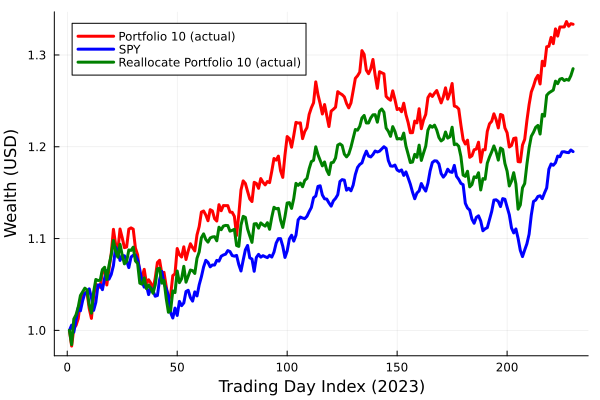

In [115]:
plot((1/portfolio_performance_array_original[1,end]).*portfolio_performance_array_original[:,end], 
    lw=3, c=:red, label="Portfolio $(portfolio_index) (actual)")
plot!((1/SPY_df[1,:volume_weighted_average_price]).*SPY_df[1:number_of_trading_days,:volume_weighted_average_price], lw=3, 
    c=:blue, label="SPY")
plot!((1/portfolio_performance_array_reallocate[1,end]).*portfolio_performance_array_reallocate[:,end], lw=3, 
    c=:green, label="Reallocate Portfolio $(portfolio_index) (actual)")
xlabel!("Trading Day Index (2023)", fontsize=18)
ylabel!("Wealth (USD)", fontsize=18)

In [116]:
share_volume_array = Array{Float64,2}(undef, number_of_trading_days+1, length(w)+1)

# initial (tday = 0)
share_volume_array[1,1] = 0;
for i ‚àà eachindex(my_list_of_tickers)
    share_volume_array[1,i+1] = N‚Çí[i]
end

for i ‚àà 1:number_of_trading_days
    n_vector = my_results_df[i,:N_new]
    share_volume_array[i+1,1] = i;
    for j ‚àà eachindex(n_vector)
        share_volume_array[i+1,j+1] = n_vector[j] |> x-> round(x,digits=3) |> abs
    end
end
header_data = Array{String,1}()
push!(header_data,"index");
[push!(header_data, ticker) for ticker ‚àà my_list_of_tickers]
pretty_table(share_volume_array, header=header_data)

‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ index ‚îÇ    MSFT ‚îÇ     AMD ‚îÇ    NVDA ‚îÇ   RCL ‚îÇ     PHM ‚îÇ        V ‚îÇ     SPY ‚îÇ      QQQ ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ   0.0 ‚îÇ 30194.5 ‚îÇ 5297.47 ‚îÇ     0.0 ‚îÇ   0.0 ‚îÇ     0.0 ‚îÇ 0.231448 ‚îÇ 43135.2 ‚îÇ 0.181488 ‚îÇ
‚îÇ   1.0 ‚îÇ   0.079 ‚îÇ 24936.4 ‚îÇ 14676.7 ‚îÇ 0.015 ‚îÇ 4680.94 ‚îÇ  15535.9 ‚îÇ 25432.0 ‚îÇ  25407.9 ‚îÇ
‚îÇ   2.0 ‚îÇ   0.018 ‚îÇ 27163.5 ‚îÇ 18942.8 ‚îÇ 0.022 ‚îÇ 52192.6 ‚îÇ  33771.8 ‚îÇ  5978.4 ‚îÇ  27389.2 ‚îÇ
‚îÇ   3.0 ‚îÇ   0.016 ‚î